In [1]:
import numpy as np
import PIL
import PIL.Image
import torch
import torchvision as tv

In [2]:
model = tv.models.resnet18(pretrained=True).eval()
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [3]:
transform = tv.transforms.Compose([
    tv.transforms.Resize(256),
    tv.transforms.CenterCrop(224),
    tv.transforms.ToTensor(),
    tv.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [4]:
with open('../data/imagenet-labels.txt', 'r') as file:
    labels = list(map(lambda x: x.strip(), file.readlines()))

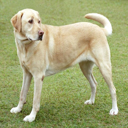

In [5]:
img = PIL.Image.open("../data/dog.jpg")
img.resize((128, 128))

In [6]:
tensor = transform(img).unsqueeze(0)
tensor.shape, tensor.dtype

(torch.Size([1, 3, 224, 224]), torch.float32)

In [7]:
logits = model(tensor)
logits.shape

/Users/ckauten/Documents/SensoryCloud/data-engineering/gotorch/scripts/.env/lib/python3.9/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


torch.Size([1, 1000])

In [8]:
logits.softmax(1).max(1)

torch.return_types.max(
values=tensor([0.7066], grad_fn=<MaxBackward0>),
indices=tensor([208]))

In [9]:
labels[logits.argmax().item()]

'Labrador Retriever'